In [93]:
import numpy as np
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as model, torchvision
import torchvision.transforms as transforms
import seaborn as sns

In [125]:
df1 = pd.read_csv("/content/DataSet3.csv")

df1.sample(7)

,User id,Name,Gender,Age,Profession,Hobbies,number of likes,number of dislikes,number of replies,Followers in 1000s,Quality check
805,DA100,kani,F,30,politician,"cooking,meditation",10,-7,7,3.00,worst
474,AS125,kani,M,42,home maker,dance,25,-5,14,1.83,excellent
4387,KP524,ramya,M,22,dancer,dance,25,-5,9,1.30,excellent
3385,RA100,kalpana,F,42,politician,"songs,reading",90,-6,NIL,11.20,excellent
3852,AP112,asvi,M,25,politician,-,75,-3,12,3.10,excellent
2586,GH152,amsa,Don't disclose,45,chef,"sports,music",65,-4,9,3.00,excellent
2464,RA100,suganthi,Don't disclose,30,home maker,dance,85,-7,7,12.10,excellent


In [126]:
df1.columns

Index(['User id', 'Name', 'Gender', 'Age', 'Profession', 'Hobbies ',
       'number of likes ', 'number of dislikes', 'number of replies',
       'Followers in 1000s', 'Quality check'],
      dtype='object')

In [127]:
df1.shape

(5000, 11)

In [128]:
df1.isna().sum()

User id                 0
Name                    0
Gender                  0
Age                     0
Profession            523
Hobbies                 0
number of likes         0
number of dislikes      0
number of replies       0
Followers in 1000s      0
Quality check           0
dtype: int64

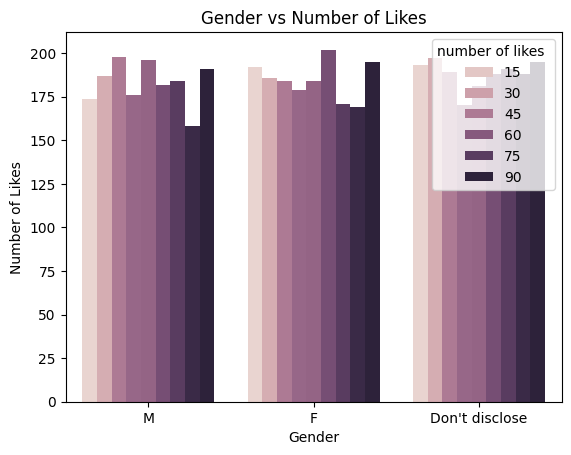

In [129]:
sns.countplot(data=df1, x="Gender", hue="number of likes ")
plt.title("Gender vs Number of Likes")
plt.xlabel("Gender")
plt.ylabel("Number of Likes")
plt.show()


In [131]:
df1[(df1['Hobbies ']=="devotional") & (df1["Followers in 1000s"]>df1["Followers in 1000s"].mean())][['Name','Followers in 1000s']]

,Name,Followers in 1000s
9,nakshatra,12.10
20,ranji,12.10
21,mekala,8.66
40,mekala,11.20
60,nakshatra,8.66
...,...,...
4800,nakshatra,12.10
4803,amsa,8.66
4837,amsa,12.10
4843,suganthi,12.10


In [130]:
def value_counts_categorical(f1):
  value_counts_dict = {}
  for column in f1.select_dtypes(include=["object"]):
      value_counts_dict[column] = f1[column].value_counts()
  return value_counts_dict

categorical_value_counts = value_counts_categorical(df1)

for column, counts in categorical_value_counts.items():
  print(f"Value counts for column '{column}':")
  print(counts)
  print("-------------------------------------------------")

Value counts for column 'User id':
User id
AG123    546
UP100    509
IN234    508
DA100    506
AS125    505
GH152    501
AP112    495
RA100    490
US110    474
KP524    466
Name: count, dtype: int64
-------------------------------------------------
Value counts for column 'Name':
Name
kalpana      526
kani         522
amsa         522
mekala       512
suganthi     499
ranji        494
asvi         487
jivi         484
ramya        478
nakshatra    476
Name: count, dtype: int64
-------------------------------------------------
Value counts for column 'Gender':
Gender
Don't disclose    1692
F                 1662
M                 1646
Name: count, dtype: int64
-------------------------------------------------
Value counts for column 'Profession':
Profession
nil           526
home maker    525
chef          522
dancer        503
doctor        498
politician    490
professor     477
coacher       470
artist        466
Name: count, dtype: int64
---------------------------------------------

In [114]:
df1['number of dislikes'].replace('NIL', 0, inplace=True)
df1['number of replies'].replace('NIL', 0, inplace=True)


In [135]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

def value_counts_categorical(f1):
  value_counts_dict = {}
  for column in f1.select_dtypes(include=["object"]):
    value_counts_dict[column] = f1[column].value_counts()
    f1[column] = label_enc.fit_transform(f1[column])
  return value_counts_dict

categorical_value_counts = value_counts_categorical(df1)

for column, counts in categorical_value_counts.items():
  print(f"Value counts for column '{column}':")
  print(counts)
  print("-------------------------------------------------")


Value counts for column 'Gender':
Gender
Don't disclose    1692
F                 1662
M                 1646
Name: count, dtype: int64
-------------------------------------------------
Value counts for column 'Profession':
Profession
nil           526
home maker    525
chef          522
dancer        503
doctor        498
politician    490
professor     477
coacher       470
artist        466
Name: count, dtype: int64
-------------------------------------------------
Value counts for column 'Hobbies ':
Hobbies 
dance                 585
politics,cooking      575
devotional            568
cooking,meditation    565
food reviewer         558
-                     548
yoga                  542
songs,reading         532
sports,music          527
Name: count, dtype: int64
-------------------------------------------------
Value counts for column 'number of dislikes':
number of dislikes
-12    671
-4     649
-6     640
NIL    639
-5     618
-7     616
-2     592
-3     575
Name: count, dtype:

In [173]:
df1.to_csv('21BAI1900.csv', index=False)

<Axes: >

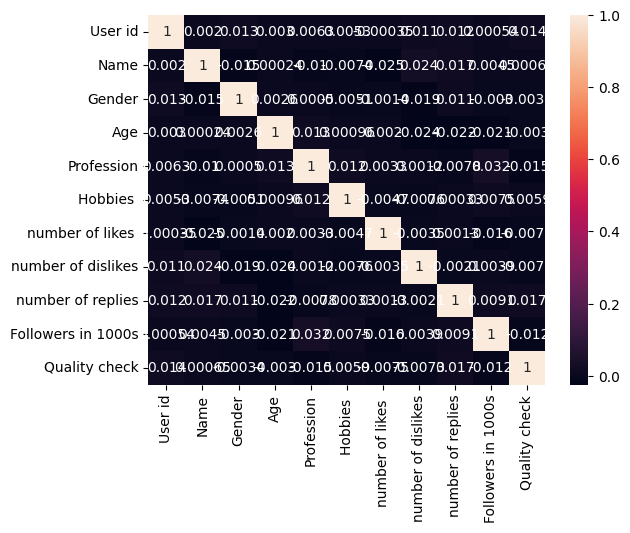

In [116]:
sns.heatmap(df1.iloc[:,:].corr(),annot=True)

In [132]:
df1 = df1.drop('Name', axis=1)
df1 = df1.drop('User id', axis=1)

In [136]:
df1.describe()

,Gender,Age,Profession,Hobbies,number of likes,number of dislikes,number of replies,Followers in 1000s,Quality check
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.990800,30.863400,4.539400,3.952600,55.787000,3.506000,1.982800,4.881796,0.989400
std,0.817098,13.515993,2.857846,2.564151,25.103619,2.308816,1.398891,4.018614,0.818426
min,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.900000,0.000000
25%,0.000000,25.000000,2.000000,2.000000,45.000000,1.000000,1.000000,1.830000,0.000000
50%,1.000000,35.000000,5.000000,4.000000,55.000000,4.000000,2.000000,3.100000,1.000000
75%,2.000000,42.000000,7.000000,6.000000,75.000000,6.000000,3.000000,8.660000,2.000000
max,2.000000,45.000000,9.000000,8.000000,90.000000,7.000000,4.000000,12.100000,2.000000


In [137]:
df1.sample(7)

,Gender,Age,Profession,Hobbies,number of likes,number of dislikes,number of replies,Followers in 1000s,Quality check
2480,0,0,5,1,55,1,1,2.12,2
1858,1,45,1,6,45,3,2,8.66,1
1460,1,22,6,1,25,0,2,12.10,2
1028,2,0,4,3,54,3,3,3.10,0
1810,2,25,0,8,75,7,0,1.83,0
4558,0,22,9,4,65,2,3,8.66,1
2431,0,42,8,6,45,5,2,11.20,2


In [142]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df1.iloc[:,:-1], df1.iloc[:,-1], train_size=0.8, random_state=1)

print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 8)
y_train shape: (4000,)
X_test shape: (1000, 8)
y_test shape: (1000,)


In [143]:
x_train = torch.FloatTensor(x_train.to_numpy())
x_test = torch.FloatTensor(x_test.to_numpy())
y_train = torch.FloatTensor(y_train.to_numpy())
y_test = torch.FloatTensor(y_test.to_numpy())

# Model1

In [157]:
class nn_class(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(8,16)
    self.l2 = nn.Linear(16,8)
    self.l3 = nn.Linear(8,3)

  def forward(self,x):
    x = self.l1(x)
    x = self.l2(x)
    x = self.l3(x)
    x = F.softmax(x,dim=1)
    return x

classify = nn_class()
classify

nn_class(
  (l1): Linear(in_features=8, out_features=16, bias=True)
  (l2): Linear(in_features=16, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=1, bias=True)
)

In [162]:
loss_fxn = nn.CrossEntropyLoss()

optim1 = torch.optim.Adam(classify.parameters(),lr=0.4)

def accuracy(y1,y2):
  t = torch.eq(y1,y2).sum().item()
  return (t/len(y1))*100

In [186]:
losses1=[]

for epoch in range(1000):
    classify.train()

    outputs = classify(x_train).squeeze()

    loss = loss_fxn(outputs,y_train)
    acc = accuracy(y_train,outputs)

    losses.append(loss)

    optim1.zero_grad()
    loss.backward()
    optim1.step()

    classify.eval()
    with torch.inference_mode():
        test_logits = classify(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fxn(test_logits,
                            y_test)
        test_acc = accuracy(y_test,
                               test_pred)
    if epoch % 30 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 30 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 60 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 90 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 120 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 150 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 180 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 210 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 240 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 270 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 300 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoc

# Model 2

In [182]:
class nn_class(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(8,16)
    self.l2 = nn.Linear(16,20)
    self.l3 = nn.Linear(20,10)
    self.l4 = nn.Linear(10,1)

  def forward(self,x):
    x = self.l1(x)
    x = self.l2(x)
    x = self.l3(x)
    x = self.l4(x)
    x = F.softmax(x,dim=1)
    return x

classify = nn_class()
classify

nn_class(
  (l1): Linear(in_features=8, out_features=16, bias=True)
  (l2): Linear(in_features=16, out_features=20, bias=True)
  (l3): Linear(in_features=20, out_features=10, bias=True)
  (l4): Linear(in_features=10, out_features=1, bias=True)
)

In [183]:
loss_fxn = nn.CrossEntropyLoss()

optim1 = torch.optim.Adam(classify.parameters(),lr=0.4)

def accuracy(y1,y2):
  t = torch.eq(y1,y2).sum().item()
  return (t/len(y1))*100

In [184]:
losses=[]

for epoch in range(1000):
    classify.train()

    outputs = classify(x_train).squeeze()

    loss = loss_fxn(outputs,y_train)
    acc = accuracy(y_train,outputs)

    losses.append(loss)

    optim1.zero_grad()
    loss.backward()
    optim1.step()

    classify.eval()
    with torch.inference_mode():
        test_logits = classify(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fxn(test_logits,
                            y_test)
        test_acc = accuracy(y_test,
                               test_pred)
    losses1.append(accuracy)
    if epoch % 30 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 30 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 60 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 90 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 120 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 150 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 180 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 210 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 240 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 270 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoch: 300 | Loss: 32570.73242, Accuracy: 33.48% | Test loss: 7045.91016, Test acc: 31.20%
Epoc